In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
lddisp = pd.read_excel('Alfa Data set adjusted.xlsx', usecols="A:C")
inboard = pd.read_excel('Alfa Data set adjusted.xlsx', sheet_name=1, usecols="A:J")
outboard = pd.read_excel('Alfa Data set adjusted.xlsx', sheet_name=2, usecols="A:J")


In [3]:
outboard -= outboard.mean(axis=1)[7]
inboard -= inboard.mean(axis=1)[7]


In [4]:
all = pd.concat([lddisp, inboard.add_prefix("in "), outboard.add_prefix("out ")], axis=1)
all.head()

,LOADCELL [kN],displacement 1 [mm],displacement 2 [mm],in SG 1,in SG 2,in SG 3,in SG 4,in SG 5,in SG 6,in SG 7,...,out SG 1,out SG 2,out SG 3,out SG 4,out SG 5,out SG 6,out SG 7,out SG 8,out SG 9,out SG 10
0,0.000000,0.000000,0.000000,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,...,-0.000035,-0.000035,-0.000035,-0.000035,-3.459920e-05,-0.000035,-3.459920e-05,-3.459920e-05,-3.459920e-05,-0.000035
1,-2.275772,-0.000091,-0.002213,0.000008,0.000004,0.000007,0.000006,0.000012,0.000011,0.000007,...,-0.000006,-0.000002,-0.000002,-0.000006,-1.134973e-06,-0.000001,8.157516e-08,-2.369725e-06,7.660530e-07,0.000009
2,-4.402758,0.000249,-0.001827,0.000005,0.000003,0.000006,0.000005,0.000012,0.000008,0.000006,...,-0.000005,-0.000001,-0.000001,-0.000004,8.831540e-07,0.000001,2.418737e-06,1.186132e-07,2.844300e-06,0.000011
3,-147.314777,0.029468,0.042890,0.000011,-0.000003,0.000011,0.000001,0.000009,-0.000007,0.000005,...,-0.000001,-0.000003,-0.000001,-0.000007,6.549077e-07,-0.000001,1.661291e-06,-9.906488e-07,2.326432e-06,0.000007
4,-371.265535,0.297432,0.533308,0.000019,-0.000017,0.000031,-0.000013,0.000011,-0.000031,0.000002,...,0.000003,-0.000007,0.000002,-0.000010,4.863586e-06,-0.000006,1.982829e-06,-2.365367e-06,7.102806e-07,0.000003


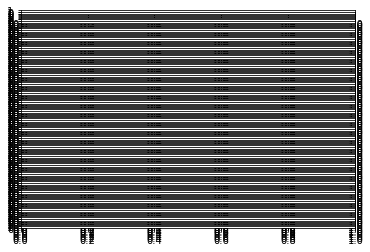

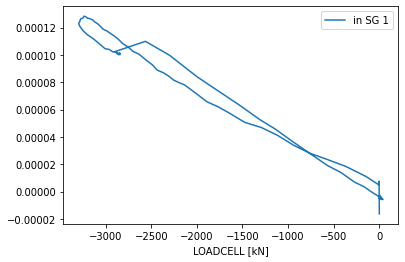

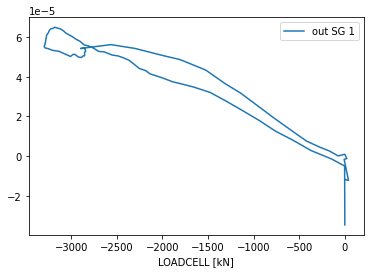

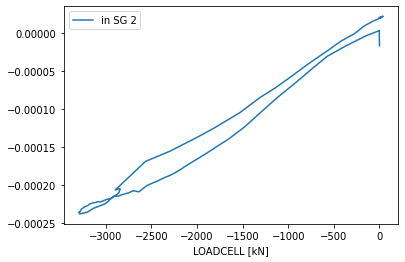

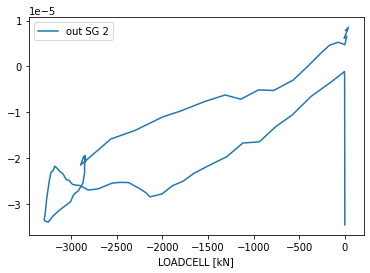

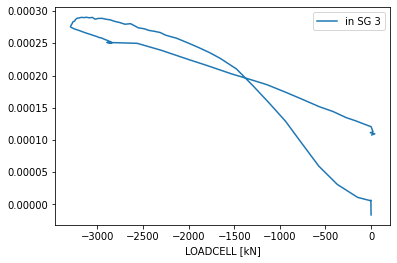

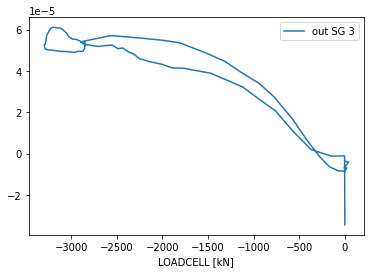

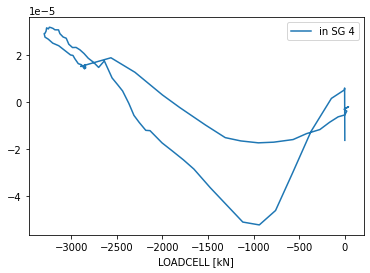

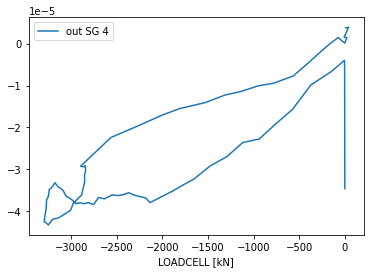

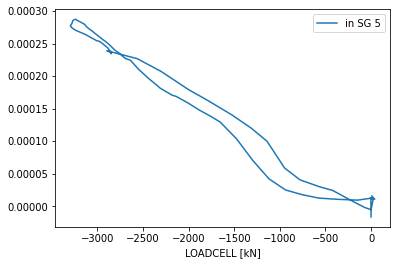

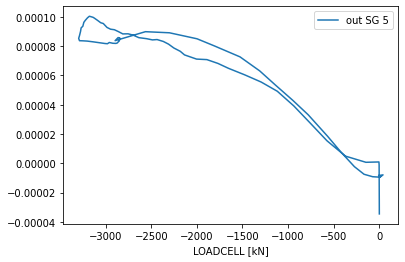

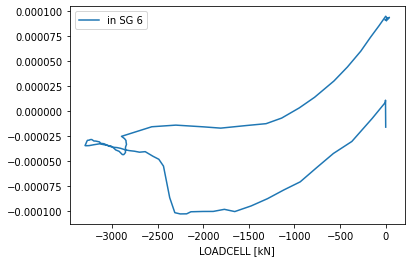

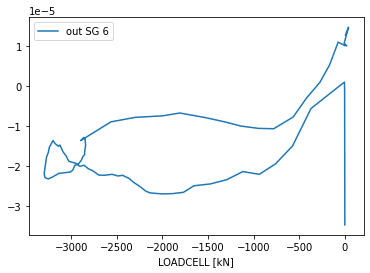

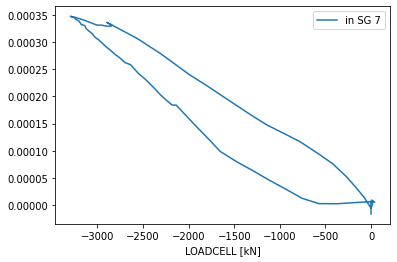

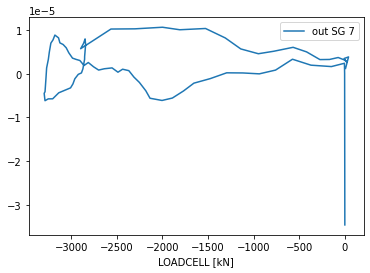

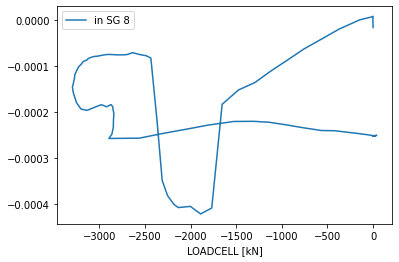

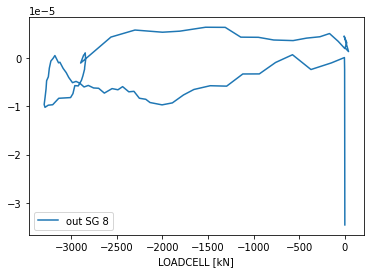

In [5]:
fig, ax = plt.subplots(121)
for i in range(8):
    ax[0] = all.plot(x="LOADCELL [kN]", y=f'in SG {i+1}')
    ax[1] = all.plot(x="LOADCELL [kN]", y=f'out SG {i+1}')
plt.show()

In [6]:
# lddisp['delta_disp'] = lddisp['displacement 2 [mm]'] - lddisp['displacement 1 [mm]']
# lddisp['average_disp'] = (lddisp['displacement 2 [mm]'] + lddisp['displacement 1 [mm]']) / 2
#

In [7]:
# a, ax = plt.subplots(figsize=(11, 9))
# plt.plot(lddisp["LOADCELL [kN]"], lddisp["average_disp"])
# plt.title("Average Displacement over Loadcell")


In [8]:
# corr_in = inboard.corr()
# corr_out = outboard.corr()
#

In [9]:
# i, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr_in, cmap=cmap, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
#
#

In [10]:
# o, ax = plt.subplots(figsize=(11, 9))
# sns.heatmap(corr_out, cmap=cmap, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 1584x1296 with 0 Axes>

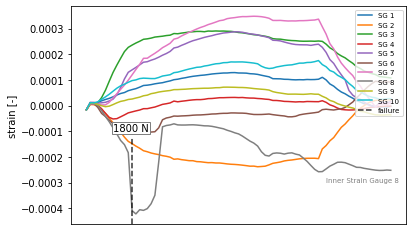

In [27]:
plt.figure(num="inboard1", figsize=[22, 18])
inboard.plot()
frame1 = plt.gca()
plt.ylabel('strain [-]')
plt.axvline(12, ymax=0.4, color='black', alpha=0.8, ls='--', label="failure")
plt.legend(loc='upper right', fontsize='x-small')
plt.text(7, -0.0001, "1800 N", bbox=dict(facecolor='white', edgecolor='grey', pad=1.0))
plt.text(63, -0.0003, "Inner Strain Gauge 8", color='grey', fontsize=7)
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
# plt.show()
plt.savefig("Plots/inGauge.pdf", format='pdf', bbox_inches="tight")

<Figure size 1584x1296 with 0 Axes>

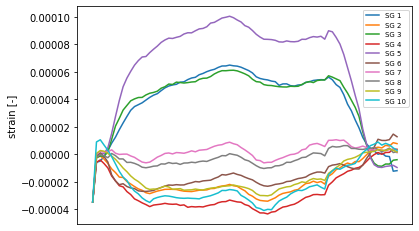

In [30]:
plt.figure(num="outboard1", figsize=[22, 18])
outboard.plot()
frame1 = plt.gca()
plt.ylabel('strain [-]')
#plt.axvline(12, ymax=0.4, color='black', alpha=0.8, ls='--', label="failure")
plt.legend(loc='upper right', fontsize='x-small')
#plt.text(7, -0.0001, "1800 N", bbox=dict(facecolor='white', edgecolor='grey', pad=1.0))
#plt.text(63, -0.0003, "Inner Strain Gauge 8", color='grey', fontsize=7)
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
#plt.show()
plt.savefig("Plots/outGauge.pdf", format='pdf', bbox_inches="tight")

In [13]:
# fig, ax = plt.subplots(121)
# ax[0].figure(num="inboard1")
# ax[1].figure(num="outboard1")

In [14]:
#plt.subplots(figsize=(11, 9))
#for i in range(5):
#    plt.plot(inboard["SG " + str(2*i+1)], inboard["SG "+ str(2*i+2)], label="SG "+ str(2*i+1) + ", "+ str(2*i+2))
#plt.title("In Gauges")
#plt.legend()
#plt.grid()
#
##%%
#
#plt.subplots(figsize=(11, 9))
#for i in range(5):
#    plt.plot(outboard["SG " + str(2*i+1)], outboard["SG "+ str(2*i+2)], label="SG "+ str(2*i+1) + ", "+ str(2*i+2))
#plt.title("Out Gauges")
#plt.legend()
#plt.grid()
#
##%%
#
#b =  4.00   # m
#h = 1.484   # m
#Z = b * h ** 2 / 6   # sectional modulus m^3
##F = o * Z / l
#L = 2.870   # m
#l_in = [L-1.1, L-0.9, L-0.6, L-0.3] # m
#l_out = [1.1, 0.9, 0.6, 0.3]        # m
#E = 1000    # GPa (random value)
#

In [15]:
# j = 0
# F = pd.DataFrame()
# for column in inboard:
#     if column != "SG 9" and column != "SG 10":
#         F["in " + column] = inboard[column].astype('float') * Z * E / l_in[int(j / 2)]
#         j += 1
# j = 0
# for column in outboard:
#     if column != "SG 9" and column != "SG 10":
#         F["out " + column] = outboard[column].astype('float') * Z * E / l_out[int(j / 2)]
#         j += 1
# F

In [16]:
# plt.plot(F)